<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Networks" data-toc-modified-id="Convolutional-Neural-Networks-1">Convolutional Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1">Requirements</a></span></li></ul></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-2">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-3">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-4">Extra Credit</a></span></li></ul></div>

# Convolutional Neural Networks

For this assignment, use the `NeuralNetworkClassifier_CNN` class defined for you in `neuralnetworks_A4.py` contained in [A4code.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4code.tar).  This tar file also includes other functions you will use here, contained in `mlfuncs.py`.

In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetworks_A4 as nn
import mlfuncs

## Requirements

First, look carefully at the `neuralnetworks_A4.py` and `optimizers.py` code provided above.  Some changes have been made in each. The most significant change is that the `train` function now accepts a `batch_size` argument so that the gradients we calculate don't have to be over the whole training set.  Recall that we can easily run out of memory with convolutional networks if we calculate gradients over the whole training set.  Also, `'scg'` is not a valid optimizer in this version of the code.

Implement the following functions:

    dataframe_result = run_these_parameters(X, T, n_folds,
                                            layers_structs, 
                                            methods, 
                                            epochs, 
                                            learning_rates.
                                            batch_sizes)
                                              
    result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                                  struct,
                                  n_epochs, 
                                  method, 
                                  learning_rate,
                                  batch_size)
                                  
The file `mlfuncs.py` contains several functions you will need to define these two required functions.  They are illustrated in the following examples.

In [3]:
Y = np.array([0, 1, 1, 0, 0]).reshape(-1, 1)
T = np.array([0, 1, 0, 1, 0]).reshape(-1, 1)
mlfuncs.percent_equal(Y, T)

60.0

The purpose of that one is obvious.  This next one is needed for storing your network stucture in a pandas DataFrame.  The structure must be an immutable data type.  A list is mutable, but a tuple is not.  So we must make sure all parts of the network structure specification is composed of tuples, not lists.

In [4]:
struct = [ [], [10]]
mlfuncs.list_to_tuple(struct)

((), (10,))

In [5]:
struct = [ [[2, 4, 1], [5, 4, 2]], [20, 10]]
mlfuncs.list_to_tuple(struct)

(((2, 4, 1), (5, 4, 2)), (20, 10))

And here is a function that generates all training, validation, and testing partitions given the data and the number of folds.  It creates the partitions in a stratified manner, meaning all folds will have close to the same proportion of samples from each class.

In [6]:
X = np.arange(12).reshape(6, 2)
T = np.array([0, 0, 1, 0, 1, 1]).reshape(-1, 1)
X, T

(array([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1]]))

In [7]:
for Xtrain, Ttrain, Xval, Tval, Xtest, Ttest in mlfuncs.generate_partitions(X, T, n_folds=3, classification=True):
        print(Xtrain, '\n', Ttrain, '\n', Xval, '\n', Tval, '\n', Xtest, '\n', Ttest)
        print()

[[6 7]
 [8 9]] 
 [[0]
 [1]] 
 [[2 3]
 [4 5]] 
 [[0]
 [1]] 
 [[ 0  1]
 [10 11]] 
 [[0]
 [1]]

[[2 3]
 [4 5]] 
 [[0]
 [1]] 
 [[6 7]
 [8 9]] 
 [[0]
 [1]] 
 [[ 0  1]
 [10 11]] 
 [[0]
 [1]]

[[6 7]
 [8 9]] 
 [[0]
 [1]] 
 [[ 0  1]
 [10 11]] 
 [[0]
 [1]] 
 [[2 3]
 [4 5]] 
 [[0]
 [1]]

[[ 0  1]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [8 9]] 
 [[0]
 [1]] 
 [[2 3]
 [4 5]] 
 [[0]
 [1]]

[[2 3]
 [4 5]] 
 [[0]
 [1]] 
 [[ 0  1]
 [10 11]] 
 [[0]
 [1]] 
 [[6 7]
 [8 9]] 
 [[0]
 [1]]

[[ 0  1]
 [10 11]] 
 [[0]
 [1]] 
 [[2 3]
 [4 5]] 
 [[0]
 [1]] 
 [[6 7]
 [8 9]] 
 [[0]
 [1]]



The function `run_these_parameters` loops through all values in `layers_structs`, `methods`, `epochs`, `learning rates` and `batch_sizes`.  For each set of parameter values, it loops through all ways of creating training, validation, and testing partitions using `n_folds`.  For each of these repetitions, `train_this_partition` is called to create the specified convolutional neural network, trains it, collects the percent correct on training, validation, and test sets, and returns a list of parameter values and the three accuracies.  `run_these_parameters` returns all of these results as a `pandas` DataFrame with column names `('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %')`. 

The resulting DataFrame results stored in variable `df` can be summarized with a statement like

      df.groupby(['struct', 'method', 'n_epochs', 'learning_rate',
                  'batch_size']).mean())

In [ ]:
##train_this_partition 
def train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size):
    print(struct)
    classes = np.unique(T)
    cnn = nn.NeuralNetworkClassifier_CNN([28, 28, 1], [(4, 8, 2)], [5], classes)
    cnn.train(Xtrain, Ttrain, 100, 'adam',0.9)
    Ytest, _ = cnn.use(Xtrain)
    Ytest, _ = cnn.use(Xtest)
    Ytest, _ = cnn.use(Xval)
    print(cnn)
    plt.plot(cnn.get_error_trace())
    print(f'MNIST CNN Test {100 * np.mean(Ytest == Ttest)} % correct, with {cnn.all_weights.size} weights')
    return 

In [ ]:
##run_these_parameters
def run_these_parameters(X, T, n_folds=4,
                         structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                             # [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10, 20],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[-1, 10, 50, 100]):
    #Pandas df creation
        ## Call train_this_partition
                            output = train_this_partition(train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size))
        
        
        
    

Define the two required functions in code cells above this cell.

The following examples show examples of how they should run, as

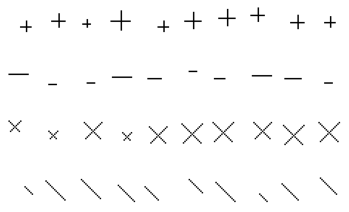

In [8]:
def make_images(n_each_class):
    '''Make 20x20 black and white images with diamonds or squares for the two classes, as line drawings.'''
    images = np.zeros((n_each_class * 4, 20, 20))  # nSamples, rows, columns
    radii = 3 + np.random.randint(10 - 5, size=(n_each_class * 4, 1))
    centers = np.zeros((n_each_class * 4, 2))
    for i in range(n_each_class * 4):
        r = radii[i, 0]
        centers[i, :] = r + 1 + np.random.randint(18 - 2 * r, size=(1, 2))
        x = int(centers[i, 0])
        y = int(centers[i, 1])
        if i < n_each_class:
            # plus
            images[i, x - r:x + r, y] = 1.0
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 2:
            # minus
            images[i, x, y - r:y + r] = 1.0
        elif i < n_each_class * 3:
            # x
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0
            images[i, range(x - r, x + r), range(y + r, y - r, -1)] = 1.0
        else:
            # /
            images[i, range(x - r, x + r), range(y - r, y + r)] = 1.0

    T = np.array(['plus'] * n_each_class + ['minus'] * n_each_class + ['times'] * n_each_class + ['divide'] * n_each_class).reshape(-1, 1)

    n, r, c = images.shape
    images = images.reshape(n, r, c, 1)  # add channel dimsension
    return images, T

n_each_class = 10
X, T = make_images(n_each_class)
p = 0
for i in range(4 * n_each_class):
    p += 1
    plt.subplot(4, n_each_class, p)
    plt.imshow(-X[i, :, :, 0], cmap='gray')
    plt.axis('off')

In [9]:
n_each_class = 500
X, T = make_images(n_each_class)
X.shape,T.shape

((2000, 20, 20, 1), (2000, 1))

The function run_these_parameters loops through all values in layers_structs, methods, epochs, learning rates and batch_sizes. For each set of parameter values, it loops through all ways of creating training, validation, and testing partitions using n_folds. For each of these repetitions, train_this_partition is called to create the specified convolutional neural network, trains it, collects the percent correct on training, validation, and test sets, and returns a list of parameter values and the three accuracies. run_these_parameters returns all of these results as a pandas DataFrame with column names ('struct', 'method', 'n_epochs', 'learning_rate', 'batch_size', 'train %', 'val %', 'test %').

The resulting DataFrame results stored in variable df can be summarized with a statement like

  df.groupby(['struct', 'method', 'n_epochs', 'learning_rate',
              'batch_size']).mean())

In [10]:
structs = [ [[2, 5, 1]], [5] ]
n_epochs = 10
method= ['adam','sgd']
learning_rate = [0.01]
batch_size = 10

n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain:ntrain+nval], ...]
Tval = T[rows[ntrain:ntrain+nval], ...]
Xtest = X[rows[ntrain+nval:], ...]
Ttest = T[rows[ntrain+nval:], ...]

In [32]:
##run_these_parameters
import pandas as pd
from itertools import product
import itertools

In [57]:
structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                             # [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
methods=['adam','sgd','p'], # , 'sgd'],
epochs=[10, 20],
learning_rates=[0.01], #, 0.1],
batch_sizes=[-1, 10, 50, 100]

In [34]:
la,lb,lc,ld,le = len(structs),len(methods),len(epochs),len(learning_rates),len(batch_sizes)
# now find the max
print(la,lb,lc,ld,le)
max_len = max(la,lb,lc,ld,le)

1 1 1 1 4


In [35]:
def tupletolistandmaxlen(structs,method,epochs,learning_rates,batch_sizes):
    la,lb,lc,ld,le = len(structs),len(method),len(epochs),len(learning_rates),len(batch_sizes)
    # now find the max
    max_len = max(la,lb,lc,ld,le)
    if not max_len == la:
      structs = list(structs)
      structs.extend(['']*(max_len-la))
    if not max_len == lb:
      methods = list(methods)
      methods.extend(['']*(max_len-lb))
    if not max_len == lc:
      epochs = list(epochs)  
      epochs.extend(['']*(max_len-lc))
    if not max_len == ld:
      learning_rates = list(learning_rates)
      learning_rates.extend(['']*(max_len-ld))
    if not max_len == le:
      batch_sizes = list(batch_sizes)  
      batch_sizes.extend(['']*(max_len-le))
    structs = tuple(structs)
    methods = tuple(methods)
    epochs = tuple(epochs)
    learning_rates = tuple(learning_rates)
    batch_sizes = tuple(batch_sizes)
    return structs,method,epochs,learning_rates,batch_sizes

In [56]:
if not max_len == la:
  #structs = list(structs)
  structs.extend(['']*(max_len-la))
if not max_len == lb:
  methods = list(methods)
  methods.extend(['']*(max_len-lb))
if not max_len == lc:
  epochs = list(epochs)  
  epochs.extend(['']*(max_len-lc))
if not max_len == ld:
  learning_rates = list(learning_rates)
  learning_rates.extend(['']*(max_len-ld))
if not max_len == le:
  batch_sizes = list(batch_sizes)  
  batch_sizes.extend(['']*(max_len-le))
#structs = tuple(structs)
#methods = tuple(methods)
#epochs = tuple(epochs)
#learning_rates = tuple(learning_rates)
#batch_sizes = tuple(batch_sizes)
print(structs,methods,epochs,learning_rates,batch_sizes)

AttributeError: 'tuple' object has no attribute 'extend'

In [37]:
print(structs)

[[[[[5, 3, 1]], []]], '', '', '']


In [38]:
print(len(structs),len(methods),len(epochs),len(learning_rates),len(batch_sizes))

4 4 4 4 4


In [107]:
#FIXED
structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                              [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
methods=['adam','sgd'], # , 'sgd'],
epochs=[-1, 10, 20,30],
learning_rates=[0.01], #, 0.1],
batch_sizes=[-1, 10, 50, 100],
print(type(batch_sizes))
result = pd.DataFrame((itertools.product(*structs,*methods,*epochs,*learning_rates,*batch_sizes)))
result

<class 'tuple'>
<class 'tuple'>


,0,1,2,3,4
0,"[[[5, 3, 1]], []]",adam,-1,0.01,-1
1,"[[[5, 3, 1]], []]",adam,-1,0.01,10
2,"[[[5, 3, 1]], []]",adam,-1,0.01,50
3,"[[[5, 3, 1]], []]",adam,-1,0.01,100
4,"[[[5, 3, 1]], []]",adam,10,0.01,-1
...,...,...,...,...,...
59,"[[[20, 3, 2], [5, 3, 1]], [20]]",sgd,20,0.01,100
60,"[[[20, 3, 2], [5, 3, 1]], [20]]",sgd,30,0.01,-1
61,"[[[20, 3, 2], [5, 3, 1]], [20]]",sgd,30,0.01,10
62,"[[[20, 3, 2], [5, 3, 1]], [20]]",sgd,30,0.01,50


In [59]:
structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                             # [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
methods=['adam','sgd'], # , 'sgd'],
epochs=[10, 20],
learning_rates=[0.01], #, 0.1],
batch_sizes=[-1, 10, 50, 100]
df = pd.DataFrame({'structs':[[1,2,3],[2]] , 
                   'method':['adam','sg'], 
                   'n_epochs':[10,20],
                   'learning_rate':[0.01,.2], 
                   'batch_size':[-1,1]})

uniques = [df[i].unique().tolist() for i in df.columns]
pd.DataFrame(product(*uniques), columns = df.columns)

TypeError: unhashable type: 'list'

In [20]:
df = pd.DataFrame({'structs':structs, 
                   'methods':methods, 
                   'n_epochs':epochs, 
                   'learning_rates':learning_rates, 
                   'batch_sizes':batch_sizes})
#column_names = ["structs", "methods", "n_epochs","learning_rates","batch_sizes"]

#df = pd.DataFrame(columns = column_names)
uniques = [df[i].unique().tolist() for i in df.columns]
#df.append(structs,methods, n_epochs,learning_rates,batch_sizes,ignore_index=True)
pd.DataFrame(product(*uniques), columns = df.columns)

TypeError: unhashable type: 'list'

In [108]:
classes = np.unique(T)
cnn = nn.NeuralNetworkClassifier_CNN([28, 28, 1], [(4, 8, 2),(4,8,2)], [5], classes)
print(cnn)

NeuralNetworkClassifier_CNN([28, 28, 1], [(4, 8, 2), (4, 8, 2)], [5, 4], ['divide' 'minus' 'plus' 'times'])
 Layer 0: n_units=4 kernel=8 stride=2 in_channels=1 in_rc=28 out_rc=11
 Layer 1: n_units=4 kernel=8 stride=2 in_channels=4 in_rc=11 out_rc=2
 Layer 2: n_units=5


In [ ]:
cnn.train(Xtrain, Ttrain, 100, 'adam',0.9)

In [ ]:
results = []
batch_sizes = [-1,10,20,30]
n_folds = 4
for Xtrain,Ttrain,Xval,Tval,Xtest,Ttest in mlfuncs.generate_partitions(X, T, n_folds, validation=True, shuffle=True, classification=True):
    ## Call train_this_partition
        print(Xtrain.shape)
        classes = np.unique(T)
        cnn = nn.NeuralNetworkClassifier_CNN([28, 28, 1], [(4, 8, 2)], [5], classes)
        print(cnn)
        Train_out = cnn.train(Xtrain, Ttrain, 100, 'adam',0.9)
        Ytest, _ = cnn.use(Xtrain)
        Ytest, _ = cnn.use(Xtest)
        Ytest, _ = cnn.use(Xval)
        print(cnn)
        plt.plot(cnn.get_error_trace())
        print(f'MNIST CNN Test {100 * np.mean(Ytest == Ttest)} % correct, with {cnn.all_weights.size} weights')

In [ ]:
# from A4mysolution import *

In [ ]:
struct = [ ((2, 5, 1)), (5) ]
n_epochs = 10
method= 'adam'
learning_rate = 0.01
batch_size = 10

n_samples = X.shape[0]
rows = np.arange(n_samples)
np.random.shuffle(rows)
ntrain = int(n_samples * 0.8)
nval = int(n_samples * 0.1)
Xtrain = X[rows[:ntrain], ...]
Ttrain = T[rows[:ntrain], ...]
Xval = X[rows[ntrain:ntrain+nval], ...]
Tval = T[rows[ntrain:ntrain+nval], ...]
Xtest = X[rows[ntrain+nval:], ...]
Ttest = T[rows[ntrain+nval:], ...]
           
result = train_this_partition(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                              struct, n_epochs, method, learning_rate, batch_size)
result

In [ ]:
df = run_these_parameters(X, T, n_folds=4,
                         structs=[
                             # [ [], [] ],
                             # [ [], [10] ],
                             [[[5, 3, 1]], []],
                             # [[[20, 3, 2], [5, 3, 1]], [20]],
                            ],
                          methods=['adam'], # , 'sgd'],
                          epochs=[10, 20],
                          learning_rates=[0.01], #, 0.1],
                          batch_sizes=[-1, 10, 50, 100])
df

# Experiments

When you have `train_this_partition` and `run_these_parameters`, use them to explore the parameter values, trying to find combinations of parameter values that result in high validation accuracies.  

Start with one value for each of the five parameters, but remember to specifiy them as a list of one element, like `learning_rates=[0.01]`.  Then run again with 3 or 4 values for one parameter.  Note the best value.  Use that value for that parameter, then add more values for a different parameter.  

Proceed this way for each of the parameter values.  Discuss what you observe after each call to `run_these_parameters` with at least two sentences for each run.  Do the parameter values you find that work best surprise you?  Also discuss how well the validation and test accuracies equal each other.

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method.  Report training, validation and test accuracy for your best validation results for each of the three methods.


# Grading

(UPDATED Oct. 21, 9:35am, tolerance on accuracies is now larger) Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

In [ ]:
%run -i A4grader.py

# Extra Credit

Repeat the above experiment using a convolutional neural network defined in `Pytorch`.  Implement this yourself by directly calling `torch.nn` functions.